# Poverty and education analysis

Using the data available in https://databank.worldbank.org/reports.aspx?source=2&Topic=11, performed some EDA and extract valuable information.



In [98]:
# Importing required libraries and dataset 

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import random 

df = pd.read_csv('data.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Afghanistan,AFG,..,..,67.24795,..,69.68829,..,72.12863,..,73.3,..,73.3,..
1,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Albania,ALB,..,28.1,12.9,..,10.3,..,7.8,..,5.3,..,2.8,..
2,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Algeria,DZA,..,..,28.88661,..,24.98121,..,21.07581,..,17.17042,..,13.26502,..
3,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


We need to replace those '..' with NaNs, so we do it using pandas an np.nan

In [99]:
df.replace({'..':np.nan},inplace=True)
df.iloc[:,4:15] = df.iloc[:,4:15].astype(float)
#country_codes = df['Country Code'].unique()
#country_names = df['Country Name'].unique()
countries = pd.DataFrame({'Country Code':df['Country Code'].unique(),'Country Names':df['Country Name'].unique()})

In [100]:
df.columns = ['Year','Series Code','Country Name','Country Code',1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
df.head()

,Year,Series Code,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Afghanistan,AFG,NaN,NaN,67.24795,NaN,69.68829,NaN,72.12863,NaN,73.3,NaN,73.3,NaN
1,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Albania,ALB,NaN,28.1,12.9,NaN,10.3,NaN,7.8,NaN,5.3,NaN,2.8,NaN
2,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Algeria,DZA,NaN,NaN,28.88661,NaN,24.98121,NaN,21.07581,NaN,17.17042,NaN,13.26502,NaN
3,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df_col = df[df['Country Code']=='COL']
df_bel = df[df['Country Code']=='BEL']
df_col.head(29)

,Year,Series Code,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
42,Population living in slums (% of urban populat...,EN.POP.SLUM.UR.ZS,Colombia,COL,NaN,21.17683,13.11016,NaN,11.76571,NaN,10.42127,NaN,9.7,NaN,9.7,NaN
308,Proportion of people living below 50 percent o...,SI.DST.50MD,Colombia,COL,NaN,22.7,21.9,21.8,21.7,21.1,20.7,20.2,20.4,21.2,23.0,NaN
574,Multidimensional poverty headcount ratio (% of...,SI.POV.MDIM,Colombia,COL,NaN,NaN,26.5,24.3,21.6,19.8,17.6,NaN,19.1,17.5,18.1,NaN
840,Multidimensional poverty intensity (average sh...,SI.POV.MDIM.IT,Colombia,COL,NaN,NaN,42.3,42.2,41.6,41.7,41.3,NaN,41.7,41.4,41.4,NaN
1106,"Multidimensional poverty headcount ratio, hous...",SI.POV.MDIM.HH,Colombia,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,"Multidimensional poverty headcount ratio, fema...",SI.POV.MDIM.FE,Colombia,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1,17.9,NaN
1638,"Multidimensional poverty headcount ratio, male...",SI.POV.MDIM.MA,Colombia,COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9,18.3,NaN
1904,Poverty headcount ratio at $3.65 a day (2017 P...,SI.POV.LMIC,Colombia,COL,NaN,33.2,16.8,15.3,14.3,13.0,12.9,12.1,12.2,13.7,21.1,NaN
2170,Poverty gap at $3.65 a day (2017 PPP) (%),SI.POV.LMIC.GP,Colombia,COL,NaN,16.9,6.2,5.7,5.2,4.7,4.7,4.3,4.4,5.0,9.8,NaN
2436,Poverty headcount ratio at $6.85 a day (2017 P...,SI.POV.UMIC,Colombia,COL,NaN,59.5,39.8,37.6,35.4,34.6,34.4,33.7,33.9,34.8,44.2,NaN


Now we verified all the ".." have been replaced with NaNs

In [102]:
# Create a new array with the series I want to plot in a sns lineplot.
income_share_series = ['SI.DST.FRST.20','SI.DST.02ND.20','SI.DST.03RD.20','SI.DST.04TH.20','SI.DST.05TH.20']
income_col = df_col.loc[df_col['Series Code'].isin(income_share_series)]
income_col.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
income_col = income_col.T
income_col.columns = income_col.iloc[0]
income_col = income_col.tail(-1)
income_col

C:\Users\acer\AppData\Local\Temp\ipykernel_12872\3660721371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_col.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)


Year,Income share held by second 20%,Income share held by third 20%,Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%
2012,7.5,12.0,19.7,57.3,3.5
2013,7.5,12.1,19.6,57.3,3.5
2014,7.6,12.1,19.6,57.2,3.6
2015,7.9,12.5,20.0,55.8,3.8
2016,8.1,12.6,19.9,55.5,3.9
2017,8.3,12.8,20.1,54.8,4.1
2018,8.1,12.6,19.9,55.4,4.0
2019,7.9,12.4,19.8,56.2,3.7
2020,7.4,11.9,19.6,58.3,2.8


Text(0.5, 1.0, "Last decade's income share in Colombia")

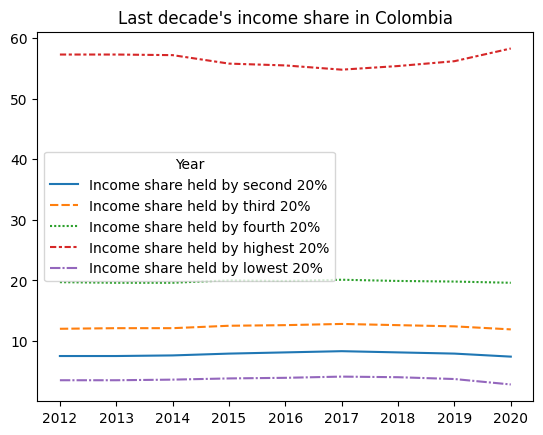

In [103]:
sns.lineplot(data=income_col)
plt.title("Last decade's income share in Colombia")

Now that we created the plot, we are going to create a **function** that can do it for any country code.

In [141]:
country = countries.sample().values.tolist()[0]
print(country)

['UKR', 'Ukraine']


In [144]:
def income_plot(country): # Receives a list with country code and country name
    df_country = df[df['Country Code']==country[0]]
    income_share_series = ['SI.DST.FRST.20','SI.DST.02ND.20','SI.DST.03RD.20','SI.DST.04TH.20','SI.DST.05TH.20']
    income = df_country.loc[df_country['Series Code'].isin(income_share_series)]
    income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)
    income = income.T
    income.columns = income.iloc[0]
    income = income.tail(-1)
    sns.lineplot(data=income)
    plt.title(f"Last decade's income share in {country[1]}")

C:\Users\acer\AppData\Local\Temp\ipykernel_12872\986617279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.drop(columns=['Series Code', 'Country Name','Country Code', 1990,2000,2021],inplace=True)


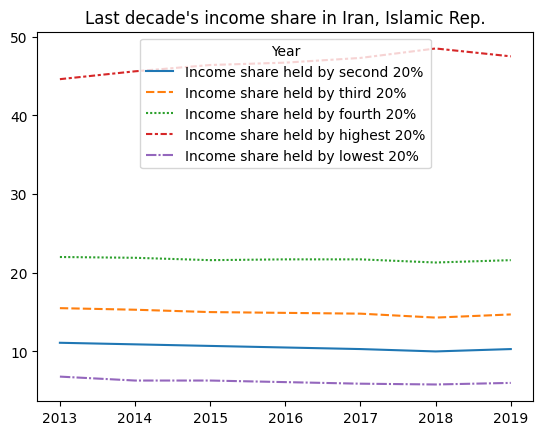

In [156]:
country = countries.sample().values.tolist()[0]
income_plot(country)